<a href="https://colab.research.google.com/github/vishwanath103/MIT-DL-Course/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

     |████████████████████████████████| 2.1MB 7.7MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-cp36-none-any.whl size=2115443 sha256=561adebda8494544bc11504b6ce76057820f59db4afd90c3bf8f686e8d60e5c5
  Stored in directory: /root/.cache/pip/wheels/af/dc/2a/5c3633135e7e4ef4fd31463cfa1942cb1bae7486ab94e7a2ad
Successfully built mitdeeplearning


## MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 0s 0us/step


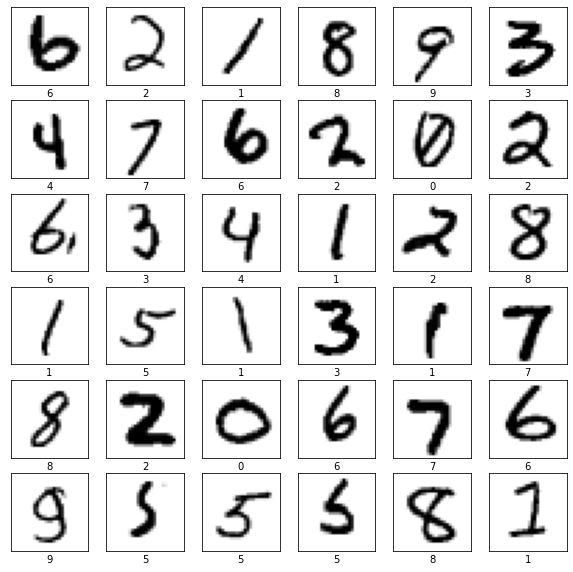

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [5]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
            # First define a Flatten layer
            tf.keras.layers.Flatten(),

            # Dense layer with activation function
            tf.keras.layers.Dense(128, activation='relu'),

            # Dense layer for output classification probabilities
            tf.keras.layers.Dense(10, activation='sigmoid')
  ])
  return fc_model

model  = build_fc_model()

In [8]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])